In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 不偏性
## 定数項なし
定数項を含まない単純回帰モデルを想定：
$$
y_i = \beta x_i + u_i,~~~~ i = 1,\ldots,n
$$
回帰直線
$$
\hat{y} = \hat{\beta}x
$$
を引く．ここで，最小二乗推定量 $\hat{\beta}$ は
$$
\hat{\beta} = \frac{\sum_i x_iy_i}{\sum_i x_i^2}
$$
で与えられる．この最小二乗推定量は確率変数であるが，不偏性を満たすことが知られている．つまり，$\hat{\beta}$ は真の係数（パラメータ）$\beta$ と平均的に一致する．
$$
\text{E}(\hat{\beta}) = \beta.
$$
この抽象的でわかりにくい性質を，モンテカルロ・シミュレーションを通して理解する．

### データ発生過程（母集団）
$$
y_i = \beta x_i + u_i \\
\beta = 1, ~~ u_i \overset{i.i.d}{\sim} N(0, 0.02), ~~ x_i \overset{iid}{\sim} U(-0.5,0.5)
$$
この DGP からモンテカルロ標本を $J = 10^5$ 個作成し，それぞれについて最小二乗推定値 $\hat{\beta}_j$ を計算し，ヒストグラムを描画する．ヒストグラムは $\beta = 1$ を中心にしてばらつくはずである．

In [2]:
J = 10**5            # # of Monte Carlo samples
n = 30               # sample size
beta = 1             # true slope coefficient
sigsq = 0.02         # error variance
sig = np.sqrt(sigsq) # error standard deviation
x = np.random.rand(n) - 0.5 # generate x from Unif(-0.5, 0.5) and make it fixed
sum_squared = sum(x * x) # sum of squares of x

In [3]:
estimates = []
for j in range(J):
    u = np.random.normal(loc=0, scale=sig, size=n) # generate error from N(0, 0.02)
    y = beta * x + u                               # generate y
    sum_products = sum(x * y)                      # sum of cross product of x and y
    beta_hat = sum_products / sum_squared          # OLS estimator for beta
    estimates.append(beta_hat)                     # save outputs

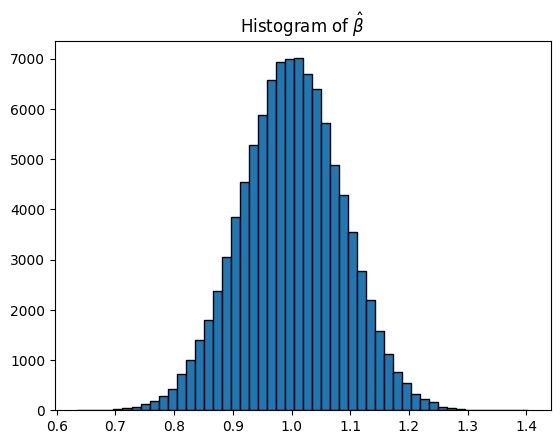

In [4]:
# plot a histogram of estimates for beta
fig, ax = plt.subplots()
ax.hist(estimates, bins=50, edgecolor="k")
ax.set_title(r"Histogram of $\hat{\beta}$");

### モンテカルロ・シミュレーションの結果
$\beta$ の最小二乗推定値の標本平均（$\text{E}(\hat{\beta})$ の近似値）は

In [5]:
sample_mean = sum(estimates) / J
sample_mean

1.000241535434597

真のパラメータ $\beta = 1$ とほぼ一致していることがわかる．つまり，最小二乗推定量 $\hat{\beta}$ が不偏推定量であることを強く示唆する実験結果が得られた．

## 定数項あり
散布図から定数項を含む単純回帰モデルを考える：
$$
y_i = \alpha + \beta x_i + u_i,~~~~ i = 1,\ldots,n
$$
回帰直線
$$
\hat{y} = \hat{\alpha} + \hat{\beta}x
$$
を引く．ここで，最小二乗推定量 $\hat{\alpha},\hat{\beta}$ は
$$
\hat{\alpha} = \bar{y} - \hat{\beta}\bar{x},~~~~
\hat{\beta} = \frac{\sum_i (x_i-\bar{x})(y_i-\bar{y})}{\sum_i (x_i-\bar{x})^2}
$$
で与えられる．この確率変数として与えられる推定量は，不偏推定量であることが知られている．つまり，$\hat{\alpha}, \hat{\beta}$ は真のパラメータ $\alpha, \beta$ と平均的に一致する．
$$
\text{E}(\hat{\alpha}) = \alpha \\
\text{E}(\hat{\beta}) = \beta
$$
この性質をモンテカルロ・シミュレーションを通して理解する．

### データ発生過程（母集団）
$$
y_i = \alpha + \beta x_i + u_i \\
\alpha = -1, ~~ \beta = 1, ~~ u_i \overset{i.i.d}{\sim} N(0, 0.02), ~~ x_i \overset{iid}{\sim} U(-0.5,0.5)
$$
この DGP からモンテカルロ標本を $J = 10^5$ 個作成し，それぞれについて最小二乗推定値 $\hat{\beta}_j, \hat{\alpha}_j$ を計算し，ヒストグラムを描画する．ヒストグラムは $\beta = 1, \alpha = -1$ を中心にしてばらつくはずである．

In [6]:
J = 10**5            # # of Monte Carlo samples
n = 30               # sample size
alpha = -1            # true intercept
beta = 1             # true slope coefficient
sigsq = 0.02         # error variance
sig = np.sqrt(sigsq) # error standard deviation
x = np.random.rand(n) - 0.5 # generate x from Unif(-0.5, 0.5) and make it fixed
x_bar = x.mean() # sample mean of x
sum_squared = sum((x - x_bar) * (x - x_bar)) # sum of squares of x

In [7]:
estimates_b = []
estimates_a = []

for j in range(J):
    u = np.random.normal(loc=0, scale=sig, size=n) # generate error from N(0, 0.02)
    y = alpha + beta * x + u                       # generate y
    y_bar = y.mean()                               # sample mean of y
    sum_products = sum((x - x_bar) * (y - y_bar))  # sum of cross product of x and y
    beta_hat = sum_products / sum_squared          # OLS estimator for beta
    alpha_hat = y_bar - beta_hat * x_bar           # OLS estimator for alpha
    # save outputs
    estimates_b.append(beta_hat)
    estimates_a.append(alpha_hat)

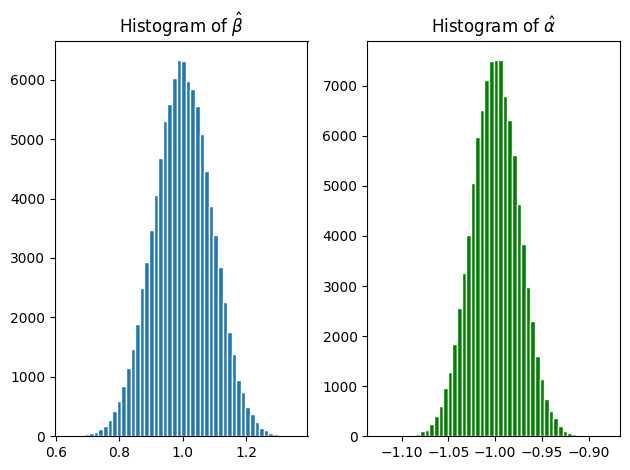

In [8]:
# plot histograms of estimates for beta and alpha
fig = plt.figure()
ax1, ax2 = fig.add_subplot(1, 2, 1), fig.add_subplot(1, 2, 2)
ax1.hist(estimates_b, bins=50, edgecolor="w")
ax1.set_title(r"Histogram of $\hat{\beta}$")
ax2.hist(estimates_a, bins=50, edgecolor="w", color="green")
ax2.set_title(r"Histogram of $\hat{\alpha}$")
fig.tight_layout();

### モンテカルロ・シミュレーションの結果
$\alpha,\beta$ の最小二乗推定値の標本平均（$\text{E}(\hat{\alpha}),\text{E}(\hat{\beta})$ の近似値）はそれぞれ，

In [9]:
sum(estimates_a) / J, sum(estimates_b) / J

(-0.9999810004011668, 0.999752480959937)

であり，真のパラメータ $\alpha = -1, \beta = 1$ とほぼ一致していることがわかる．つまり，最小二乗推定量 $\hat{\alpha},\hat{\beta}$ が不偏推定量であることを強く示唆する実験結果が得られた．